In [2]:
library(ggplot2)
library(ggExtra)
library(reshape)
library(scales)
library(tidyverse)

A felhasznált adatok forrása: https://www.kaggle.com/footprintnetwork/national-footprint-accounts-2018 (országok évi ökológiai lábnyoma és biokapacitása

In [3]:
(data <- read.csv('NFA_2018.csv'))

country,ISO.alpha.3.code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita.GDP..2010.USD.,population
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,1.350234e-01,8.383553e-02,1.371800e-02,3.366853e-02,0.000000e+00,4.273741e-01,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,4.657633e+05,2.891907e+05,4.732022e+04,1.161396e+05,0.000000e+00,1.474227e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,1.891373e-01,1.250000e-06,4.137644e-03,3.366853e-02,1.112225e+00,1.730092e+00,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,6.524291e+05,4.327841e+00,1.427280e+04,1.161396e+05,3.836620e+06,5.967954e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,2.283036e-03,0.000000e+00,4.383810e-04,0.000000e+00,4.819043e-02,5.203676e-02,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7.875332e+03,0.000000e+00,1.512195e+03,0.000000e+00,1.662329e+05,1.795008e+05,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,5.639689e-02,1.250000e-06,3.312381e-03,0.000000e+00,8.791121e-02,3.785406e-01,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,1.945411e+05,4.327841e+00,1.142606e+04,0.000000e+00,3.032497e+05,1.305776e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,1.350234e-01,0.000000e+00,1.263644e-03,3.366853e-02,1.072504e+00,1.403588e+00,949.033,3449000


Keressük meg a legnagyobb évszámot, hogy a legfrissebb adatokkal tudjunk számolni.

In [4]:
(max_year <- max(data$year))

[1] 2014

Gyűjtsük ki a 10 legnagyobb fogyasztású országot abban az évben. Azokat a sorokat kell figyelembe venni, ahol a "record" oszlop értéke "EFConsTotGHA", vagyis az összes fogyasztáshoz tartozó ökológiai lábnyom globális hektárban. Ha csak az évre és a recordra szűrünk, a számérték alapján csökkenő sorrenbde rendezve az adatokat az első helyen a világ összes fogyasztására vonatkozó adat jelenik meg, viszont mi az egyes országokra vagyunk kíváncsiak, így a szűrési feltételek közé bekerül az is, hogy az országkód ne legyen üres sztring.

In [5]:
(data_top <- data %>%
    filter(year == max_year, record == 'EFConsTotGHA', ISO.alpha.3.code != '') %>%
    select(country, country_code=ISO.alpha.3.code, total) %>%
    arrange(desc(total)) %>%
    slice(1:10))

country,country_code,total
<fct>,<fct>,<dbl>
China,CHN,5196177567
United States of America,USA,2672526804
India,IND,1450832018
Russian Federation,RUS,798644232
Brazil,BRA,634245134
Japan,JPN,601546486
Indonesia,IDN,409183923
Germany,DEU,407058581
Mexico,MEX,319556046


Ahhoz, hogy valóban lássuk, mekkora a különbség az így kapott országok lábnyoma között, érdemes oszlopdiagramon ábrázolni. A grafikon alapvetően nem őrzi meg a sorrendet, amit az imént kialakítottunk az adatsorokon. Erre egy lehetséges megoldás, hogy az x tengelynek megadandó értékeknek felülírjuk a szintezettségét. Az y tengelyen nagy számok sorakoznak, alapértelmezetten normálalakban jelennek meg. Felülírjuk vesszővel szegmentált formára, hogy olvashatóbb legyen.

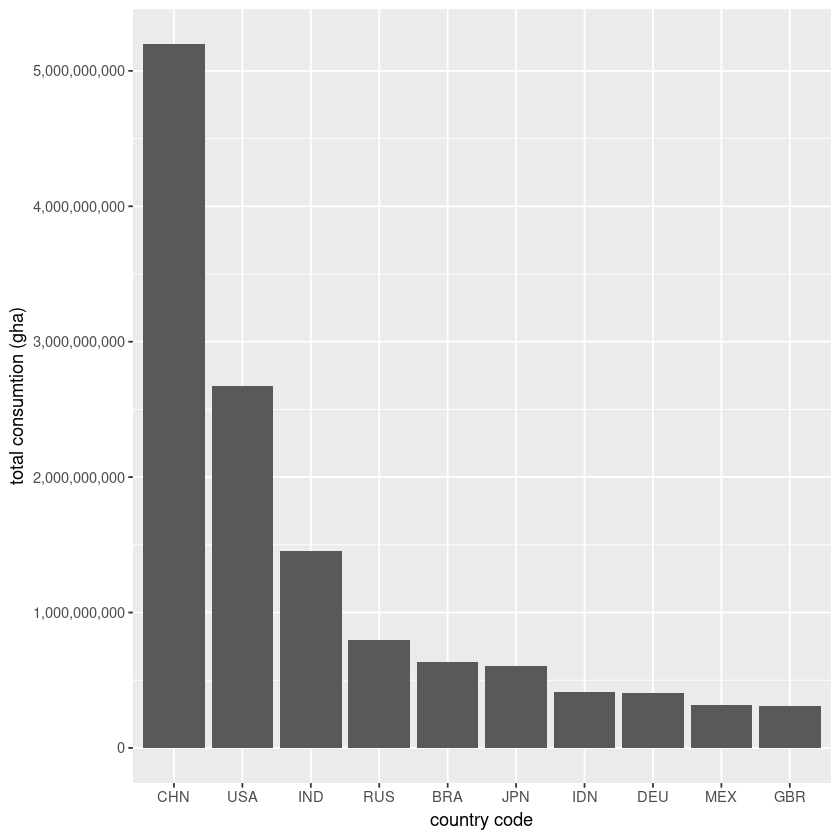

In [6]:
data_top$country_code <- factor(data_top$country_code,
                                levels=data_top$country_code[order(data_top$total, decreasing=TRUE)])

ggplot(data=data_top, aes(country_code, total)) +
    geom_col() +
    scale_y_continuous(labels=comma) +
    xlab('country code') +
    ylab('total consumtion (gha)')

Nézzük meg lineáris regresszióval, lehet-e összefüggés az egy főre jutó GDP és az egy főre jutó fogyasztás között. A GDP 2010-es adatok alapján van megadva, ehhez hűen ezúttal 2010-es fogyasztási adatokkal számolunk. Előfordulnak rekordok, ahol nincs GDP adat megadva, ezeket kizárjuk.

In [7]:
data_percap <- data %>%
    filter(year == 2010,
           record == 'EFConsPerCap',
           Percapita.GDP..2010.USD.!='NA',
           ISO.alpha.3.code != '') %>%
    select(country, UN_region, total, gdp=Percapita.GDP..2010.USD.)

A pontdiagramot a tengelyekhez tartozó hisztogramokkal egészítjük ki.

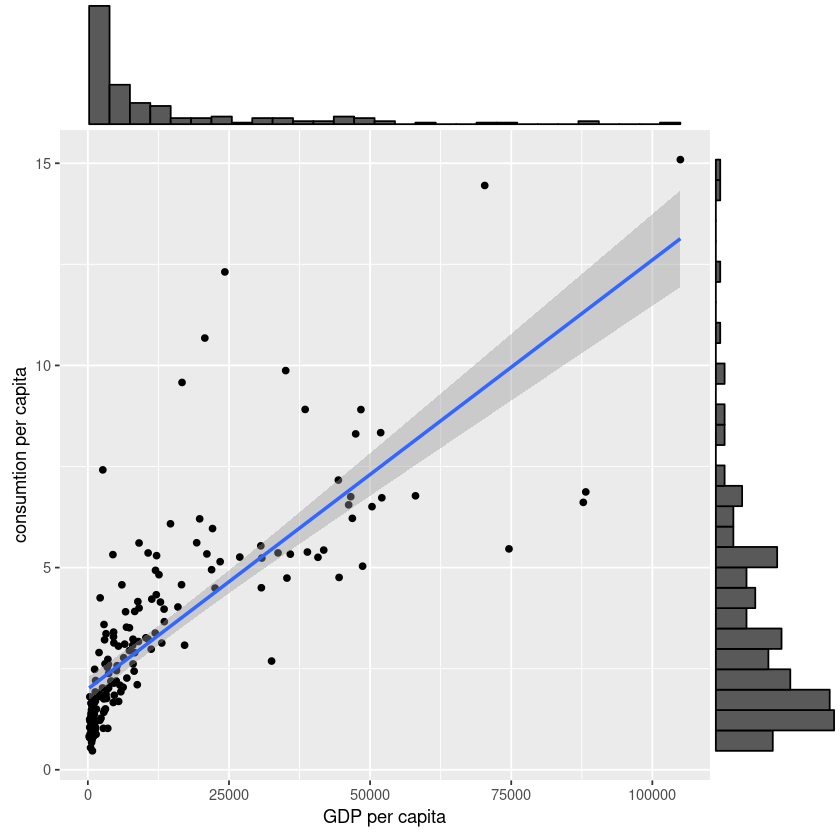

In [8]:
plot_center <- ggplot(data_percap, aes(x=gdp, y=total)) + 
    geom_point() +
    geom_smooth(method='lm') +
    xlab('GDP per capita') +
    ylab('consumtion per capita')
ggMarginal(plot_center, type='histogram')

Érdekes lenne látni, mely pontok mely országokhoz tartoznak. Mivel nagy a tumultus a bal alsó sarokban, nem előnyös minden pontot országnévvel együtt megjeleníteni. Megadhatunk viszont értékeket, amik fölött megjelenjenek a nevek. Sokat elárul még, ha az országok pontjait kontinensenként más színnel jelöljük.

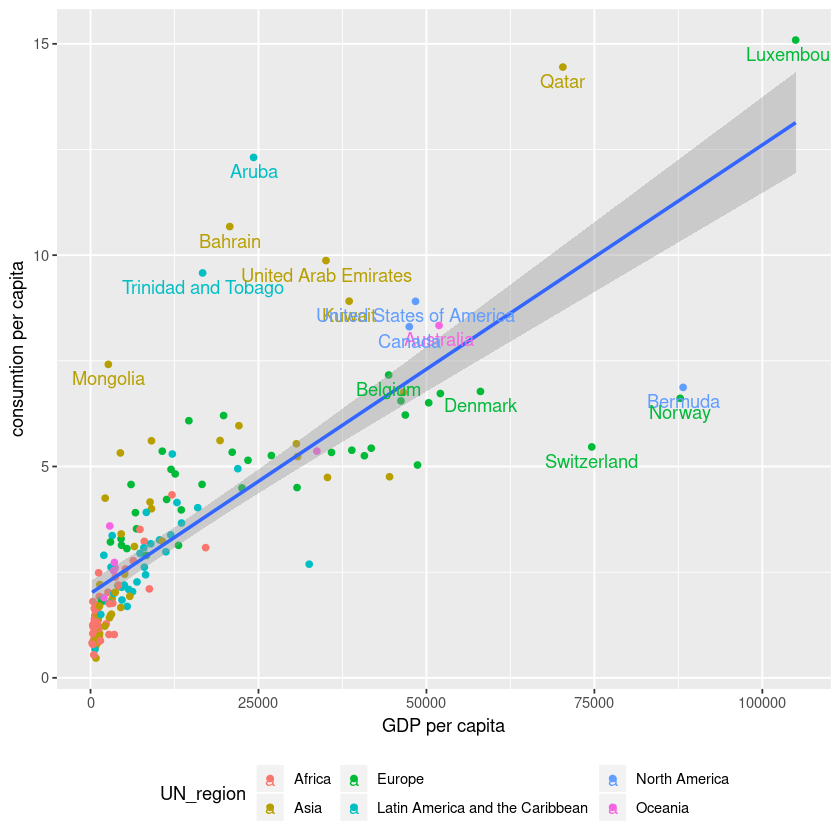

In [9]:
ggplot(data_percap, aes(x=gdp, y=total)) + 
    geom_point(aes(color=UN_region)) +
    geom_smooth(method='lm') +
    geom_text(aes(label=ifelse(total > 7 | gdp > 55000, as.character(country), ''),
                  color=UN_region), vjust=1.5) +
    theme(legend.position="bottom") +
    xlab('GDP per capita') +
    ylab('consumtion per capita')

Nézzük meg ugyanezt egy kisebb csoportra, mondjuk az EU országaira. Az EU országok kódjait külön fájlból olvassuk be.

In [10]:
(eu <- scan('eu_iso3_2019.txt', what='', sep='\n'))

[1] "AUT" "BEL" "BGR" "HRV" "CYP" "CZE" "DNK" "EST" "FIN" "FRA" "DEU" "GRC"
[13] "HUN" "IRL" "ITA" "LVA" "LTU" "LUX" "MLT" "NLD" "POL" "PRT" "ROU" "SVK"
[25] "SVN" "ESP" "SWE" "GBR"

Luxemburg a magas értékeivel erősen kilóg a sorból, a kizárásával láthatóbb lesz a többi ország.

In [11]:
data_eu_percap <- data %>%
    filter(year == 2010,
           record == 'EFConsPerCap',
           ISO.alpha.3.code %in% eu,
           ISO.alpha.3.code != 'LUX',
           Percapita.GDP..2010.USD.!='NA') %>%
    select(country, UN_region, total, gdp=Percapita.GDP..2010.USD.)

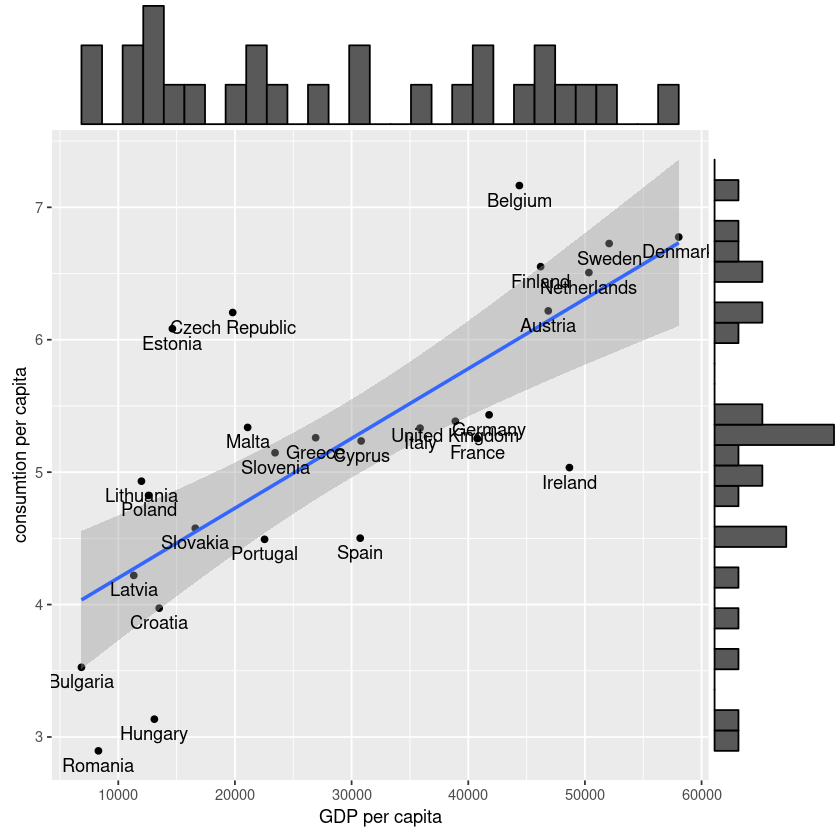

In [12]:
plot_center = ggplot(data_eu_percap, aes(x=gdp, y=total)) + 
    geom_point() +
    geom_smooth(method='lm') +
    geom_text(aes(label=country), vjust=1.5) +
    xlab('GDP per capita') +
    ylab('consumtion per capita')
ggMarginal(plot_center, type='histogram')

Hasonlítsuk össze Magyarország egy főre vetített biokapacitásának és ökológiai lábnyomának alakulását az idő függvényében.

In [13]:
data_hun <- data %>%
    filter(record == 'BiocapPerCap' | record == 'EFConsPerCap', country == 'Hungary') %>%
    select(year, record, total)

Vonaldiagrammal ábrázoljuk, a biokapacitást egy vonallal, az ökológiai lábnyomot egy másikkal. Ha a biokapacitás az ökológiai lábnyom alatt van, az ökológiai deficitet jelent.

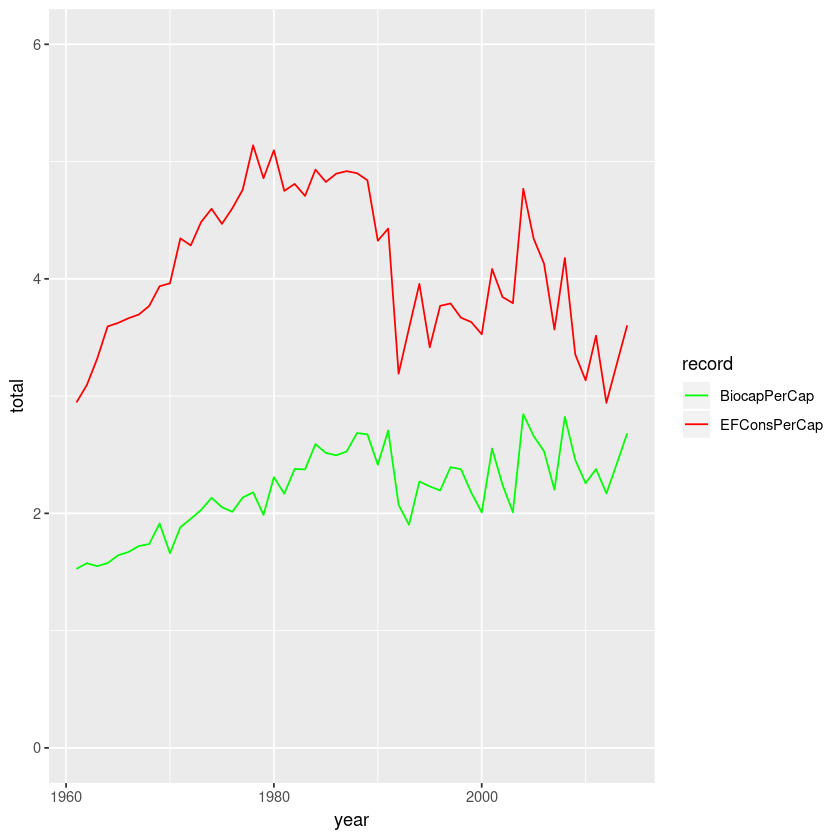

In [14]:
ggplot(data_hun, aes(year)) +
    geom_line(aes(y=total, color=record)) +
    scale_colour_manual(values =c('BiocapPerCap'='green', 'EFConsPerCap'='red')) +
    scale_y_continuous(limits=c(0, 6))

Ábrázoljuk a világ ökológiai lábnyomának földtípus szerinti eloszlását. Ha csak a legrissebb évre vagyunk kíváncsiak, a szükséges adatok egyetlen rekordban szerepelnek.

In [15]:
(record_world <- data %>%
    filter(record == 'EFConsTotGHA', country == 'World', year == max_year) %>%
    select(crop_land, grazing_land, forest_land, fishing_ground, built_up_land, carbon))

crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3996304154,1049452892,2016300467,674260917,464997947,12400597298


Ahhoz, hogy ábrázolni tudjuk, fel kell osztanunk a rekordot több rekordra úgy, hogy földtípusonként szerepeljenek az értékek. Ez mergeléssel oldható meg.

In [16]:
(data_world <- melt(record_world, id.vars=NULL))

variable,value
<fct>,<dbl>
crop_land,3996304154
grazing_land,1049452892
forest_land,2016300467
fishing_ground,674260917
built_up_land,464997947
carbon,12400597298


Az eloszlás jól látszik például kördiagramon.

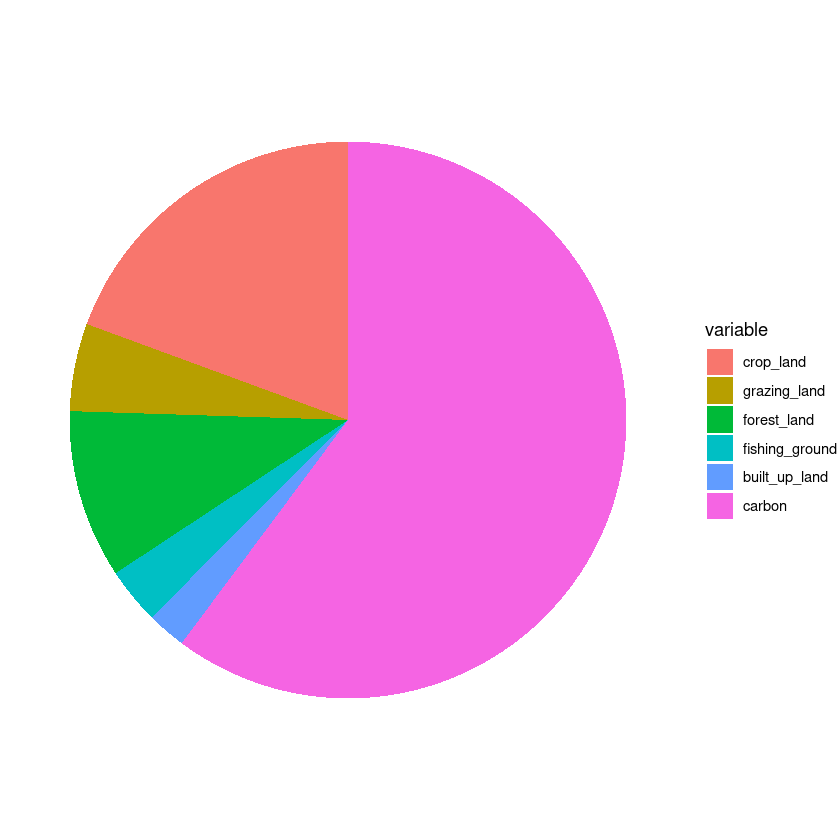

In [17]:
ggplot(data_world, aes(x='', y=value, fill=variable)) +
    geom_bar(stat='identity') +
    coord_polar('y') +
    theme_void()

Nézzük meg az eloszlás időbeli változását. Minden évhez saját rekord tartozik.

In [18]:
data_world_dia <- data %>%
    filter(record == 'EFConsTotGHA', country == 'World') %>%
    select(year, crop_land, grazing_land, forest_land, fishing_ground, built_up_land, carbon)

Az ábrázolhatóság érdekében ismét merge-re van szükség, ezúttal viszont az év oszlopot meg kell tartanunk.

In [19]:
data_world <- melt(data_world_dia, id=c('year'))

Az eloszlás időbeli változása területdiagrammal ábrázolható.

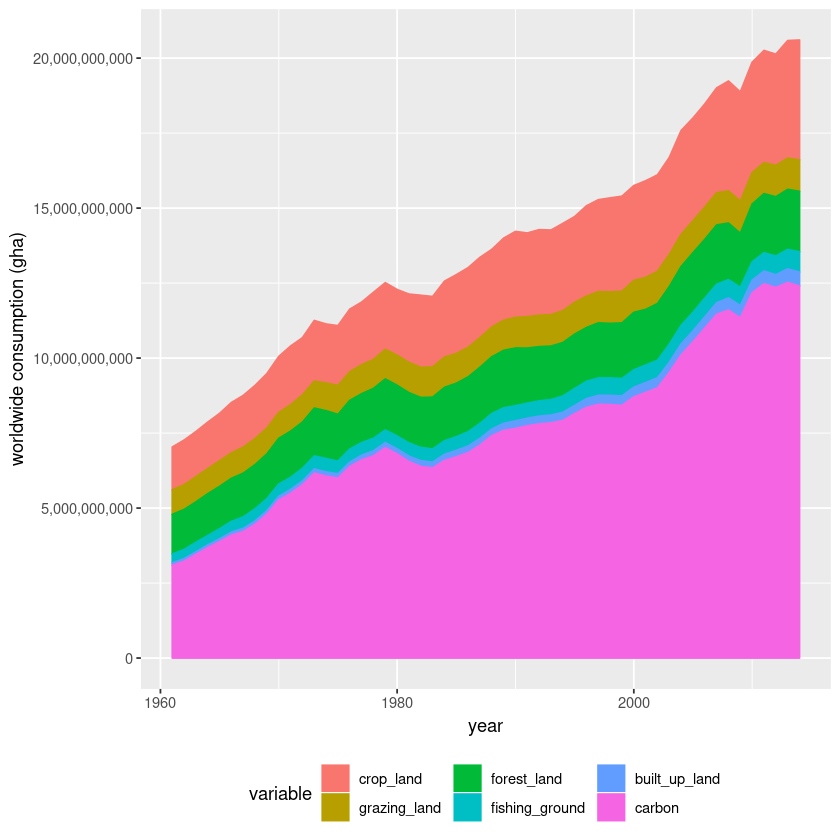

In [21]:
ggplot(data_world, aes(year, value)) +
    geom_area(aes(color=variable, fill=variable)) +
    scale_y_continuous(labels=comma) +
    theme(legend.position="bottom") +
    ylab('worldwide consumption (gha)')